<a href="https://colab.research.google.com/github/RobertaAb/Wine_IA/blob/main/IA_VinhoTinto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Informações sobre os dados avaliados**

Os dois conjuntos de dados estão relacionados com as variantes tinto e branco do vinho "Vinho Verde" português. Para obter mais detalhes, consulte a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas as variáveis ​​físico-químicas (entradas) e sensoriais (a saída) estão disponíveis (por exemplo, não há dados sobre os tipos de uva, marca de vinho, preço de venda do vinho, etc.).

Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não balanceadas (por exemplo, há muito mais vinhos normais do que excelentes ou pobres).

O conjunto de dados está disponível em: -https: //www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

##**Dados do DATASET**


1 - acidez fixa

2 - acidez volátil

3 - ácido cítrico

4 - açúcar residual

5 - cloretos

6 - dióxido de enxofre livre

7 - dióxido de enxofre total

8 - densidade

9 - pH

10 - sulfatos

11 - alcool

Variável de saída (com base em dados sensoriais):

12 - qualidade (pontuação entre 0 e 10)

##**Ambiente e ferramentas**##

1.Scikit-Learn

2.Plotly

3.Numpy

4.Pandas

5.Matplotlib

6.Tensor Flow 2.0 & Keras


In [ ]:
!pip install --upgrade gspread

In [ ]:
pip install graphic

In [ ]:
import graphic
graphic.shortcuts

<module 'graphic.shortcuts' from '/usr/local/lib/python3.7/dist-packages/graphic/shortcuts.py'>

In [ ]:
import numpy as np
from plotly.offline import plot,iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread 
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
spreasheet = gc.open('QualidadeVinho')

In [ ]:
page = spreasheet.sheet1

In [ ]:
page.row_values(1)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
import pandas as pd
QualidadeVinho = pd.DataFrame(page.get_all_records())

In [ ]:
QualidadeVinho.describe()
#resumo de informções em todas as colunas


,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,81.478684,0.270976,2.538806,15.874922,46.467792,3.311113,0.658149,5.636023
std,1.741096,227.799577,0.194801,1.409928,10.460157,32.895324,0.154386,0.169507,0.807569
min,4.600000,0.120000,0.000000,0.900000,1.000000,6.000000,2.740000,0.330000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,7.000000,22.000000,3.210000,0.550000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,14.000000,38.000000,3.310000,0.620000,6.000000
75%,9.200000,0.660000,0.420000,2.600000,21.000000,62.000000,3.400000,0.730000,6.000000
max,15.900000,975.000000,1.000000,15.500000,72.000000,289.000000,4.010000,2.000000,8.000000


In [ ]:
QualidadeVinho.isnull().sum()
#identificando dados faltantes

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
QualidadeVinho.head(10)
#exibe as 10 primeiras linhas do dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98,25.0,67.0,9.968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92,15.0,54.0,997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75,17.0,60.0,998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,75,13.0,40.0,9.978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,69,15.0,59.0,9.964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,65,15.0,21.0,9.946,3.39,0.47,10,7
8,7.8,0.58,0.02,2.0,73,9.0,18.0,9.968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,71,17.0,102.0,9.978,3.35,0.80,10.5,5


renomear as colunas

In [ ]:
QualidadeVinho.shape

(1599, 12)

In [ ]:
QualidadeVinho = QualidadeVinho.rename({'fixed acidity': 'acidez fixa', 'volatile acidity': 'acidez volátil', 'citric acid': 'ácido cítrico', 'residual sugar' : 'Acucar Residual','chlorides':'cloretos', 'free sulfur dioxide': 'dióxido de enxofre livre', 'total sulfur dioxide':'dióxido de enxofre total', 'density':'Densidade', 'sulphates': 'sulfatos', 'alcohol': 'alcool','quality': 'qualidade'}, axis=1) 

In [ ]:
QualidadeVinho

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98,25.0,67.0,9.968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92,15.0,54.0,997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75,17.0,60.0,998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,9.949,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,62,39.0,51.0,9.951.200.000.000.000,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,76,29.0,40.0,99.574,3.42,0.75,11,6
1597,5.9,645.00,0.12,2.0,75,32.0,44.0,9.954.700.000.000.000,3.57,0.71,10.2,5


# Amostra

In [ ]:
QualidadeVinho.head(10)

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98,25.0,67.0,9.968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92,15.0,54.0,997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75,17.0,60.0,998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,75,13.0,40.0,9.978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,69,15.0,59.0,9.964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,65,15.0,21.0,9.946,3.39,0.47,10,7
8,7.8,0.58,0.02,2.0,73,9.0,18.0,9.968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,71,17.0,102.0,9.978,3.35,0.80,10.5,5


In [ ]:
# EXEMPLIFICANDO UMA CONSULTA POR DENSIDADE
QualidadeDensidade = QualidadeVinho.loc[QualidadeVinho["qualidade"] == "Densidade"]
QualidadeDensidade.head(10)

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade


In [ ]:
QualidadeVinho.keys()

Index(['acidez fixa', 'acidez volátil', 'ácido cítrico', 'Acucar Residual',
       'cloretos', 'dióxido de enxofre livre', 'dióxido de enxofre total',
       'Densidade', 'pH', 'sulfatos', 'alcool', 'qualidade'],
      dtype='object')

In [ ]:
#  10 MAIORES VALORES EM QUALIDADE
QualidadeVinho.sort_values(by="qualidade", ascending=False).head(10)

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade
495,10.7,0.35,0.53,2.6,0.07,5.0,16.0,9.972,3.15,0.65,11,8
1403,7.2,0.33,0.33,1.7,61,3.0,13.0,996,3.23,1.10,10,8
390,5.6,0.85,0.05,1.4,45,12.0,88.0,9.924,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,71,7.0,16.0,9.946.200.000.000.000,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,68,6.0,12.0,99.516,3.35,0.69,11.7,8
828,7.8,0.57,0.09,2.3,65,34.0,45.0,9.941.700.000.000.000,3.46,0.74,12.7,8
481,9.4,0.30,0.56,2.8,0.08,6.0,17.0,9.964,3.15,0.92,11.7,8
455,11.3,0.62,0.67,5.2,86,6.0,19.0,9.988,3.22,0.69,13.4,8
1449,7.2,0.38,0.31,2.0,55.999.999.999.999.900,15.0,29.0,99.472,3.23,0.76,11.3,8
440,12.6,0.31,0.72,2.2,7.200.000.000.000.000,6.0,29.0,9.987,2.88,0.82,9.8,8


In [ ]:
# 10 MENORES VALORES EM QUALIDADE
QualidadeVinho.sort_values(by="qualidade", ascending=True).head(10)

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade
1478,7.1,875.000,0.05,5.70,8.199.999.999.999.990,3.0,14.0,99.808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.50,145,34.0,48.0,9.983.200.000.000.000,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.40,84,6.0,11.0,99.892,3.48,0.49,11,3
1374,6.8,815.000,0.00,1.20,267,16.0,29.0,99.471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.20,7.400.000.000.000.000,10.0,47.0,1.2008,3.25,0.57,9,3
517,10.4,0.610,0.49,2.10,0.2,5.0,16.0,9.994,3.16,0.63,8.4,3
1469,7.3,0.980,0.05,2.10,61,20.0,49.0,99.705,3.31,0.55,9.7,3
690,7.4,1.185,0.00,4.25,9.699.999.999.999.990,5.0,14.0,9.966,3.63,0.54,10.7,3
1505,6.7,0.760,0.02,1.80,78,6.0,12.0,996,3.55,0.63,9.95,3
1299,7.6,1.580,0.00,2.10,13.699.999.999.999.900,5.0,9.0,9.947.600.000.000.000,3.50,0.40,10.9,3


In [ ]:
#  VINHOS COM MAIOR ACIDEZ FIXA
QualidadeVinho.sort_values(by="acidez fixa", ascending=False).head(13)

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade
652,15.9,0.36,0.65,7.5,96,22.0,71.0,9.976,2.98,0.84,14.9,5
557,15.6,645.00,0.49,4.2,95,10.0,23.0,100.315,2.92,0.74,11.1,5
442,15.6,685.00,0.76,3.7,0.1,6.0,43.0,1.1932,2.95,0.68,11.2,7
555,15.5,645.00,0.49,4.2,95,10.0,23.0,100.315,2.92,0.74,11.1,5
554,15.5,645.00,0.49,4.2,95,10.0,23.0,100.315,2.92,0.74,11.1,5
244,15.0,0.21,0.44,2.2,75,10.0,24.0,100.005,3.07,0.84,9.2,7
243,15.0,0.21,0.44,2.2,75,10.0,24.0,100.005,3.07,0.84,9.2,7
544,14.3,0.31,0.74,1.8,75,6.0,15.0,1.2008,2.86,0.79,8.4,6
374,14.0,0.41,0.63,3.8,8.900.000.000.000.000,6.0,47.0,1.2014,3.01,0.81,10.8,6
347,13.8,0.49,0.67,3.0,9.300.000.000.000.000,6.0,15.0,9.986,3.02,0.93,12,6


In [ ]:
QualidadeVinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez fixa               1599 non-null   float64
 1   acidez volátil            1599 non-null   float64
 2   ácido cítrico             1599 non-null   float64
 3   Acucar Residual           1599 non-null   float64
 4   cloretos                  1599 non-null   object 
 5   dióxido de enxofre livre  1599 non-null   float64
 6   dióxido de enxofre total  1599 non-null   float64
 7   Densidade                 1599 non-null   object 
 8   pH                        1599 non-null   float64
 9   sulfatos                  1599 non-null   float64
 10  alcool                    1599 non-null   object 
 11  qualidade                 1599 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 150.0+ KB


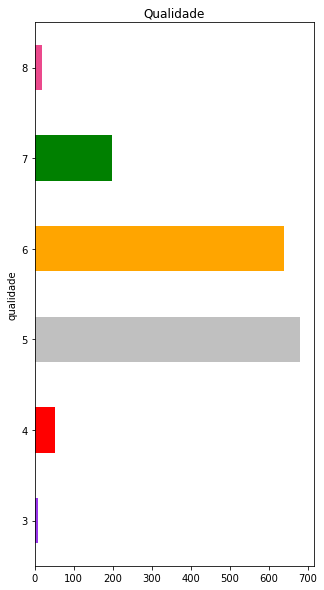

In [ ]:
# QUALIDADE DOS VINHOS POR NOTA
colors2 = ['#9834eb','red', 'silver', 'orange', 'green', '#eb498c', 'violet', '#014F50', 'gold', 'aquamarine', 'tomato', '#A80874', '#5EF38C', '#3A0328', '#D8F2CF']

QualidadeVinho.groupby(by="qualidade").size().plot(kind='barh', stacked=True, title='Qualidade', color=colors2, figsize=(5, 10))

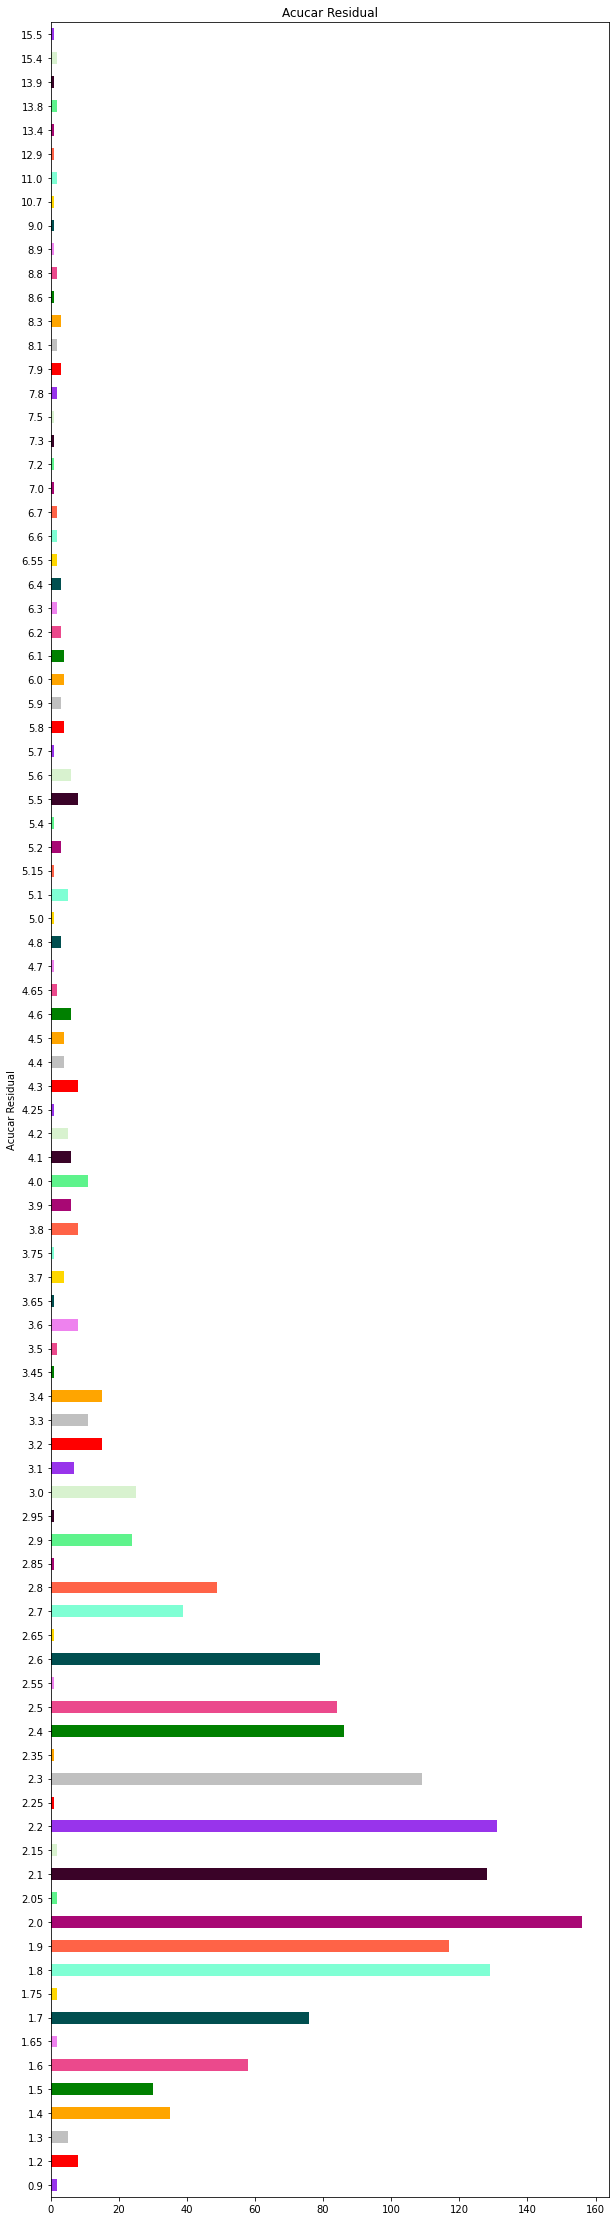

In [ ]:
# açúcar residual 
colors2 = ['#9834eb','red', 'silver', 'orange', 'green', '#eb498c', 'violet', '#014F50', 'gold', 'aquamarine', 'tomato', '#A80874', '#5EF38C', '#3A0328', '#D8F2CF']

QualidadeVinho.groupby(by="Acucar Residual").size().plot(kind='barh', stacked=True, title='Acucar Residual', color=colors2, figsize=(10, 40))

**começar a análise**

# Quantidade de vinhos de qualidade 5 e 6

In [ ]:
fig=px.bar(x =[5,6,7,4,8,3] ,y = QualidadeVinho["qualidade"].value_counts(),labels={'x':'Qualidade do Vinho','y':'Pontuação'},title="qualidade do vinho por pontuação(0 A 10)")
fig.show()

 # Acidez fixa não dá nenhuma especificação para classificar a qualidade

In [ ]:
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==3].max(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==4].max(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==5].max(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==6].max(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==7].max(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==8].max()],labels={'x':'Qualidade do Vinho','y':'Maior acidez fixa'},title="Qualidade do vinho pelos mais altos valores de acidez fixa")
fig.show()
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==3].min(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==4].min(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==5].min(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==6].min(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==7].min(),QualidadeVinho["acidez fixa"][QualidadeVinho.qualidade==8].min()],labels={'x':'Qualidade do Vinho','y':'Menor acidez fixa'},title="Qualidade do Vinho pelos Menores Valores de Acidez Fixa")
fig.show()

# É uma tendência de queda na acidez volátil conforme aumentamos a qualidade

In [ ]:
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==3].max(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==4].max(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==5].max(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==6].max(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==7].max(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==8].max()],labels={'x':'Qualidade do Vinho','y':'Maior acidez volátil'},title="Qualidade do vinho pelos mais altos valores de acidez volátil")
fig.show()
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==3].min(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==4].min(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==5].min(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==6].min(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==7].min(),QualidadeVinho["acidez volátil"][QualidadeVinho.qualidade==8].min()],labels={'x':'Qualidade do Vinho','y':'Menor acidez volátil'},title="Qualidade do vinho por menores valores de acidez volátil")
fig.show()

# O nível de álcool aumenta à medida que a qualidade do vinho aumenta

#Vamos realizar o pré-processamento de dados

Codificando um grupo de valores usando corte de pandas

referencia:https://stackoverflow.com/questions/44151071/how-to-encode-a-range-of-values-using-pandas

Vinho com faixa de qualidade entre 2 a 6 é classificado como ruim

Vinho com faixa de qualidade entre 7 a 10 é classificado como bom

In [ ]:
bins = (2,6,10)
group_names = ['ruim', 'bom']
QualidadeVinho["qualidade"] = pd.cut(QualidadeVinho["qualidade"], bins = bins, labels = group_names)
QualidadeVinho.head(n=10)

,acidez fixa,acidez volátil,ácido cítrico,Acucar Residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,Densidade,pH,sulfatos,alcool,qualidade
0,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,ruim
1,7.8,0.88,0.00,2.6,98,25.0,67.0,9.968,3.20,0.68,9.8,ruim
2,7.8,0.76,0.04,2.3,92,15.0,54.0,997,3.26,0.65,9.8,ruim
3,11.2,0.28,0.56,1.9,75,17.0,60.0,998,3.16,0.58,9.8,ruim
4,7.4,0.70,0.00,1.9,76,11.0,34.0,9.978,3.51,0.56,9.4,ruim
5,7.4,0.66,0.00,1.8,75,13.0,40.0,9.978,3.51,0.56,9.4,ruim
6,7.9,0.60,0.06,1.6,69,15.0,59.0,9.964,3.30,0.46,9.4,ruim
7,7.3,0.65,0.00,1.2,65,15.0,21.0,9.946,3.39,0.47,10,bom
8,7.8,0.58,0.02,2.0,73,9.0,18.0,9.968,3.36,0.57,9.5,bom
9,7.5,0.50,0.36,6.1,71,17.0,102.0,9.978,3.35,0.80,10.5,ruim


In [ ]:
label_quality = LabelEncoder()
#Ruim se torna 0 e bom se torna 1 
QualidadeVinho['qualidade'] = label_quality.fit_transform(QualidadeVinho['qualidade'])
QualidadeVinho["qualidade"].head()

0    1
1    1
2    1
3    1
4    1
Name: qualidade, dtype: int64

In [ ]:
vinho_ruim= QualidadeVinho[QualidadeVinho['qualidade']==0]
vinho_bom = QualidadeVinho[QualidadeVinho['qualidade']==1]
print(QualidadeVinho['qualidade'].value_counts())

fig=px.bar(x = ["Vinho Ruim","Vinho Bom"],y = [len(vinho_ruim),len(vinho_bom)],labels={'x':'Qualidade do Vinho','y':'Número dos Vinhos'},title="Qualidade de Vinho of Wine por número")
fig.show()

1    1382
0     217
Name: qualidade, dtype: int64


Está claro no gráfico que nossos dados são altamente desequilibrados. Existem muito poucos vinhos de boa qualidade nos dados. Essa situação leva a um problema de desequilíbrio de classe. Essa condição é freqüentemente encontrada em várias disciplinas, como previsão de fraude, detecção de intrusão, detecção de spam, etc. Vamos examinar mais a fundo esse problema. Temos 1382 vinhos de boa qualidade e 217 vinhos de má qualidade. Se aplicarmos um algoritmo de classificação, o algoritmo aprende bem sobre os bons casos porque há muitos pontos de dados. Como os casos ruins são muito poucos, o algoritmo não aprende muito sobre eles. Assim, o modelo final pode classificar os casos bons com perfeição. Mas, ele irá prever um grande número de casos ruins como bons.

In [ ]:
#removendo todas as características que não ajudam a classificar
QualidadeVinho =QualidadeVinho.drop("Acucar Residual",axis=1)
QualidadeVinho =QualidadeVinho.drop('dióxido de enxofre livre',axis=1)
QualidadeVinho =QualidadeVinho.drop('Densidade',axis=1)
QualidadeVinho =QualidadeVinho.drop('dióxido de enxofre total',axis=1)
QualidadeVinho =QualidadeVinho.drop('acidez fixa',axis=1)
X = QualidadeVinho.drop('qualidade', axis = 1)
y = QualidadeVinho['qualidade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.keys()

Index(['acidez volátil', 'ácido cítrico', 'cloretos', 'pH', 'sulfatos',
       'alcool'],
      dtype='object')

In [ ]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((1279, 6), (320, 6))

In [ ]:
y_train.shape,y_test.shape

((1279,), (320,))

In [ ]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
#caso os conjuntos de trem e teste estejam em escalas diferentes, isso resolverá o problema de escala
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_test

ValueError: ignored

In [ ]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [ ]:
# feature matrix
X,y = QualidadeVinho.drop('Outcome',axis=1),df_diabetes['Outcome']

TypeError: ignored

In [ ]:
# feature labels
features_label = df_diabetes.drop('Outcome',axis=1).columns

NameError: ignored

In [ ]:
# class label
class_label = ['0','1']
vinho_ruim= QualidadeVinho[QualidadeVinho['qualidade']==0]
vinho_bom = QualidadeVinho[QualidadeVinho['qualidade']==1]

In [ ]:
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [ ]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = QualidadeVinho[['qualidade','ph']].values
    y = QualidadeVinho.Outcome.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('qualidade')
    plt.ylabel('ph')
    plt.title('Decision Tree')
    plt.show()

In [ ]:
# Chamando a função criada anteriormente:

visualize_fronteiras(2,max_depth=30)

KeyError: ignored

In [ ]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

        print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 df_diabetes.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


In [ ]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(df_diabetes.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 df_diabetes.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

Observação:-
Podemos tentar diferentes algoritmos e comparar o desempenho do modelo. Classificadores baseados em árvore geralmente funcionam bem com dados desequilibrados. Como os modelos baseados em árvore funcionam aprendendo a partir de uma hierarquia de instruções if / else, eles aprendem com todas as classes. A floresta aleatória é um método de aprendizagem por conjunto que usa várias árvores de decisão. Cada árvore de decisão na floresta aleatória realiza a classificação. O resultado final da classificação é determinado por votação. As árvores individuais não são correlacionadas e os erros de uma árvore são corrigidos por outras por meio de votação. Agora, vamos aplicar o classificador de floresta aleatório e avaliar o desempenho.

In [ ]:
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=120,criterion="gini")

#Train the model
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# performance evaluation
print("Accuracy:{}%".format(round(metrics.accuracy_score(y_test, y_pred)*100)))
print("F1 Score:{}%".format(round(metrics.f1_score(y_test, y_pred)*100)))
print("Recall:{}%".format(round(metrics.recall_score(y_test, y_pred)*100)))
print("Precision:{}%".format(round(metrics.precision_score(y_test, y_pred)*100)))
m_confusion_test =metrics.confusion_matrix(y_pred, y_test)
pd.DataFrame(data = m_confusion_test, columns = ['Previsto ruim', 'Previsto Bom'],index = ['Atual Ruim', 'Atual Bom'])

In [ ]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [ ]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [ ]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

NotFittedError: ignored

In [ ]:
for feature,importancia in zip(QualidadeVinho.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

NotFittedError: ignored

In [ ]:
resultado = clf.qualidade(X_test)
resultado

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

In [ ]:
# Renderizando a árvore de forma gráfica:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot
import graphviz

dot_data= export_graphviz( 
         clf, 
         out_file=None,
         feature_names=QualidadeVinho.drop('Outcome',axis=1).columns,
         class_names=['0','1'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph


Pontuação de validação cruzada K-Folds para classificador de floresta aleatório com k = 10


In [ ]:
import warnings
warnings.filterwarnings('ignore')
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(estimator=clf,X=X_train,y=y_train, cv = kfold,scoring = "accuracy")
print("Accuracy: {}%".format(round(cv_result.mean()*100)))
cv_result = cross_val_score(estimator=clf,X=X_train,y=y_train, cv = kfold,scoring = "precision")
print("Precision: {}%".format(round(cv_result.mean()*100)))
cv_result = cross_val_score(estimator=clf,X=X_train,y=y_train, cv = kfold,scoring = "recall")
print("Recall: {}%".format(round(cv_result.mean()*100)))

A precisão da floresta aleatória aumenta de 87% para 91% usando a pontuação de validação cruzada
Vamos tentar Redes Neurais

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
## Add layers based on Input
model.add(Dense(10, activation = "relu", input_shape = (6,)))
model.add(Dense(20, activation = "relu"))
model.add(Dense(40, activation = "relu"))
model.add(Dense(60, activation = "relu"))
model.add(Dense(80, activation = "relu"))
model.add(Dense(200, activation = "relu"))
model.add(Dense(500, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, np.array(y_train), validation_split =0.2, epochs = 500, batch_size = X_train.shape[0],verbose=0)

Precisamos verificar se há ajuste excessivo e insuficiente, então desenhamos um gráfico de caixa

In [ ]:
history.history
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
tva =pd.DataFrame({
    "TrainingAcc":accuracy,
    "Val_Acc": val_accuracy
})
tva.boxplot()

In [ ]:
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["alcool"][QualidadeVinho.qualidade==3].max(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==4].max(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==5].max(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==6].max(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==7].max(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==8].max()],labels={'x':'Qualidade do Vinho','y':'Nível de álcool mais alto'},title="Qualidade do Vinho pelos Valores Mais Elevados de Nível de Álcool")
fig.show()
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["alcool"][QualidadeVinho.qualidade==3].min(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==4].min(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==5].min(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==6].min(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==7].min(),QualidadeVinho["alcool"][QualidadeVinho.qualidade==8].min()],labels={'x':'Qualidade do Vinho','y':'Menor acidez de álcool'},title="Qualidade do Vinho pelos Valores Menos Elevados de Nível de Álcool")
fig.show()

In [ ]:
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Val Loss")
plt.legend()
plt.show()
plt.plot(accuracy,label="Training Acc")
plt.plot(val_accuracy,label="Val Acc")
plt.legend()
plt.show()

In [ ]:
y_pred = np.round(model.predict(X_test))

In [ ]:
print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test, y_pred)*100)))
print("Recall: {}%".format(round(metrics.recall_score(y_test, y_pred)*100)))
print("Precision: {}%".format(round(metrics.precision_score(y_test, y_pred)*100)))
print("F1: {}%".format(round(metrics.f1_score(y_test, y_pred)*100))

In [ ]:
model.save("red_wine_model.h5")

Portanto, a rede neural não ajuda muito
Agora, vamos tentar uma técnica de regularização simples e poderosa para redes neurais e um modelo de aprendizado profundo chamado dropout.

In [ ]:
model1 = Sequential()
## Add layers based on Input
model1.add(Dense(10, activation = "relu", input_shape = (6,)))
model1.add(Dense(20, activation = "relu"))
model1.add(Dense(40, activation = "relu"))
model1.add(Dropout(0.3))
model1.add(Dense(60, activation = "relu"))
model1.add(Dropout(0.2))
model1.add(Dense(80, activation = "relu"))
model1.add(Dropout(0.3))
model1.add(Dense(200, activation = "relu"))
model1.add(Dense(500, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.compile(loss = "binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

In [ ]:
history1 = model1.fit(X_train, np.array(y_train), validation_split =0.2, epochs = 500, batch_size = X_train.shape[0],verbose=0)

In [ ]:
history1.history
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
tva =pd.DataFrame({
    "TrainingAcc":accuracy,
    "Val_Acc": val_accuracy
})
tva.boxplot()

In [ ]:
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Val Loss")
plt.legend()
plt.show()
plt.plot(accuracy,label="Training Acc")
plt.plot(val_accuracy,label="Val Acc")
plt.legend()
plt.show()

In [ ]:
y_pred = np.round(model1.predict(X_test))

In [ ]:
print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test, y_pred)*100)))
print("Recall: {}%".format(round(metrics.recall_score(y_test, y_pred)*100)))
print("Precision: {}%".format(round(metrics.precision_score(y_test, y_pred)*100)))
print("F1: {}%".format(round(metrics.f1_score(y_test, y_pred)*100)))


Portanto, a técnica de dropout melhorou as estimativas em relação à rede neural normal
Agora vamos tentar o ajuste de hiperparâmetro em nossa rede neural

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:

def Create_Model(optimizer):
    model2=Sequential()
    model2.add(Dense(10, activation = "relu", input_shape = (6,)))
    model2.add(Dense(20, activation = "relu"))
    model2.add(Dense(40, activation = "relu"))
    model2.add(Dense(60, activation = "relu"))
    model2.add(Dense(80, activation = "relu"))
    model2.add(Dense(200, activation = "relu"))
    model2.add(Dense(500, activation = "relu"))
    model2.add(Dense(1, activation = "sigmoid"))
    model2.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model2

model2=KerasClassifier(build_fn=Create_Model,verbose=0)
opt=["Adamax"]
batch_size=[20,40,100]
epochsfake=[10,50,100,500,1000]

param_grid=dict(optimizer=opt,batch_size=batch_size,epochs=epochsfake)


grid=GridSearchCV(estimator=model2,param_grid=param_grid,cv=3,n_jobs=8)
result=grid.fit(np.array(X_train),np.array(y_train))

In [ ]:
print("Best : {} using {}".format(result.best_score_,result.best_params_))

In [ ]:

model3=Sequential()
model3.add(Dense(10, activation = "relu", input_shape = (6,)))
model3.add(Dense(20, activation = "relu"))
model3.add(Dense(40, activation = "relu"))
model3.add(Dense(60, activation = "relu"))
model3.add(Dense(80, activation = "relu"))
model3.add(Dense(200, activation = "relu"))
model3.add(Dense(500, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))
model3.compile(loss = "binary_crossentropy", optimizer='adamax', metrics=["accuracy"])

In [ ]:
##encaixe com os melhores parâmetros
history3 = model3.fit(X_train, np.array(y_train), validation_split =0.2, epochs = 1000, batch_size = 40,verbose=0)

In [ ]:
history3.history
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
accuracy = history3.history["accuracy"]
val_accuracy = history3.history["val_accuracy"]
tva =pd.DataFrame({
    "TrainingAcc":accuracy,
    "Val_Acc": val_accuracy
})
tva.boxplot()

In [ ]:
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Val Loss")
plt.legend()
plt.show()
plt.plot(accuracy,label="Training Acc")
plt.plot(val_accuracy,label="Val Acc")
plt.legend()
plt.show()

In [ ]:
y_pred = np.round(model3.predict(X_test))

In [ ]:
print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test, y_pred)*100)))
print("Recall: {}%".format(round(metrics.recall_score(y_test, y_pred)*100)))
print("Precision: {}%".format(round(metrics.precision_score(y_test, y_pred)*100)))
print("F1: {}%".format(round(metrics.f1_score(y_test, y_pred)*100)))


Portanto, ao usar o ajuste de parâmetro Hyper, nosso modelo não mostra nenhuma melhoria significativa.

In [ ]:
from _pickle import dump
filename = 'Final_Model.sav'
dump(clf, open(filename, 'wb'))

In [ ]:
import matplotlib.pyplot
%matplotlib inline
QualidadeVinho.plot()
QualidadeVinho = matplotlib.pyplot.title('qualidade x ph')
QualidadeVinho = matplotlib.pyplot.ylabel('qualidade')
QualidadeVinho = matplotlib.pyplot.xlabel('ph')
QualidadeVinho = matplotlib.pyplot.show()

#densidade não dá nenhuma especificação para classificar a qualidade



In [ ]:
#O nível de sulfatos aumenta com a qualidade do vinho
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==3].max(),df["sulfatos"][QualidadeVinho.qualidade==4].max(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==5].max(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==6].max(),QualidadeVinho["sulfatoss"][QualidadeVinho.qualidade==7].max(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==8].max()],labels={'x':'Qualidade do Vinho','y':'Sulfatos mais altos'},title="Qualidade do Vinho pelos Valores Mais Elevados de Sulfatos")
fig.show()
fig=px.bar(x =[3,4,5,6,7,8] ,y =[QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==3].min(),df["sulfatos"][QualidadeVinho.qualidade==4].min(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade=5].min(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==6].min(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==7].min(),QualidadeVinho["sulfatos"][QualidadeVinho.qualidade==8].min()],labels={'x':'Qualidade do Vinho','y':'Sulfatos mais baixos'},title="Qualidade do Vinhoby pelos Valores menos Elevados de Sulfatos")
fig.show()

In [ ]:
QualidadeVinho["álcool"].isnull().sum()